<a href="https://colab.research.google.com/github/ifylala/Sentimental-Analysis-of-Flipkart-Customer-Product-Review/blob/main/Sentimental_Analysis_of_Flipkart_Customer_Product_Review_by_Ify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Programming in AI/flipkart-customer-product-review.csv')
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [4]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [5]:
df.shape

(205052, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [7]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


In [8]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [9]:
# Remove missing values
df = df.dropna()

In [10]:
#checking if there are still missing values
df.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [11]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Function to clean and pre-process text
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization and removal of stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a sentence
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the clean_text function to 'Review' and 'Summary' columns
df['cleaned_review'] = df['Review'].apply(clean_text)
df['cleaned_summary'] = df['Summary'].apply(clean_text)

# Display the cleaned dataset
print(df[['Review', 'cleaned_review', 'Summary', 'cleaned_summary']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-11-9728b48eb0c7>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_review'] = df['Review'].apply(clean_text)


            Review   cleaned_review  \
0           super!            super   
1          awesome           awesom   
2             fair             fair   
3  useless product  useless product   
4             fair             fair   

                                             Summary  \
0  great cooler excellent air flow and for this p...   
1              best budget 2 fit cooler nice cooling   
2  the quality is good but the power of air is de...   
3                  very bad product its a only a fan   
4                                      ok ok product   

                                     cleaned_summary  
0  great cooler excel air flow price amaz unbelie...  
1                   best budget fit cooler nice cool  
2                      qualiti good power air decent  
3                                    bad product fan  
4                                      ok ok product  


<ipython-input-11-9728b48eb0c7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_summary'] = df['Summary'].apply(clean_text)


In [12]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment,cleaned_review,cleaned_summary
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,super,great cooler excel air flow price amaz unbelie...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,awesom,best budget fit cooler nice cool
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,fair,qualiti good power air decent
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,useless product,bad product fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,fair,ok ok product
...,...,...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive,must buy,good product
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive,super,nice
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive,nice,nice fast deliveri
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive,wow,awesom product


In [13]:
#checking if there are still missing values
df.isnull().sum()

product_name       0
product_price      0
Rate               0
Review             0
Summary            0
Sentiment          0
cleaned_review     0
cleaned_summary    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180379 entries, 0 to 205051
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   product_name     180379 non-null  object
 1   product_price    180379 non-null  object
 2   Rate             180379 non-null  object
 3   Review           180379 non-null  object
 4   Summary          180379 non-null  object
 5   Sentiment        180379 non-null  object
 6   cleaned_review   180379 non-null  object
 7   cleaned_summary  180379 non-null  object
dtypes: object(8)
memory usage: 12.4+ MB


In [15]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment,cleaned_review,cleaned_summary
count,180379,180379,180379,180379,180379,180379,180379,180379
unique,841,479,8,1324,85306,3,1174,77426
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive,wonder,good
freq,6005,9150,105641,9014,15146,147171,9015,19435


<ipython-input-16-9167664045af>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette=custom_palette)


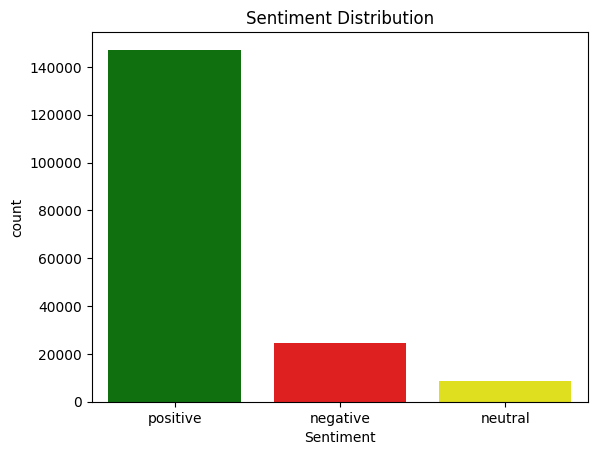

In [16]:
# Visual representation of sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {'positive': 'green', 'neutral': 'yellow', 'negative': 'red'}

sns.countplot(x='Sentiment', data=df, palette=custom_palette)
plt.title('Sentiment Distribution')
plt.show()

In [17]:
df['Rate'].value_counts()

5                                                                    105641
4                                                                     36966
1                                                                     18294
3                                                                     14024
2                                                                      5451
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)              1
Bajaj DX 2 L/W Dry Iron                                                   1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)         1
Name: Rate, dtype: int64

In [18]:
df = df[(df.Rate !='Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)') & (df.Rate != "Bajaj DX 2 L/W Dry Iron") & (df.Rate !='Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)')]

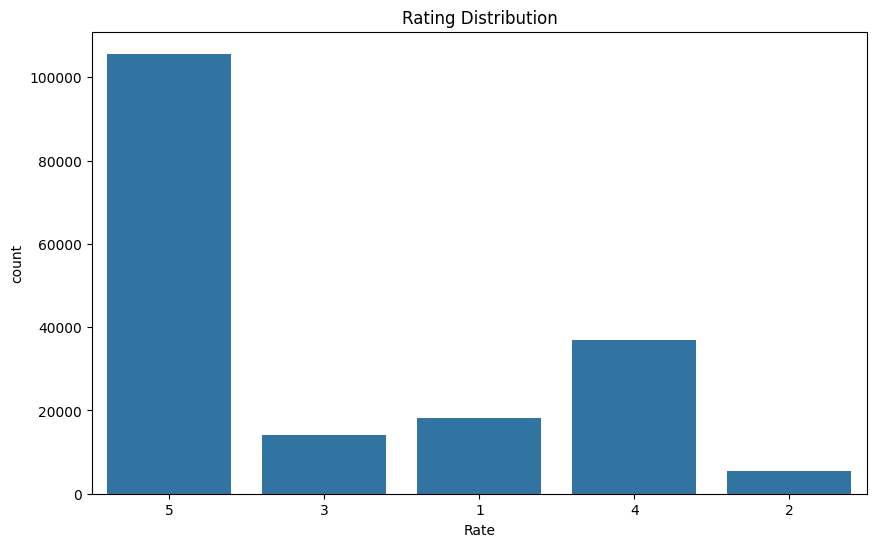

In [19]:
# Visual representation of rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Rate', data=df)
plt.title('Rating Distribution')
plt.show()

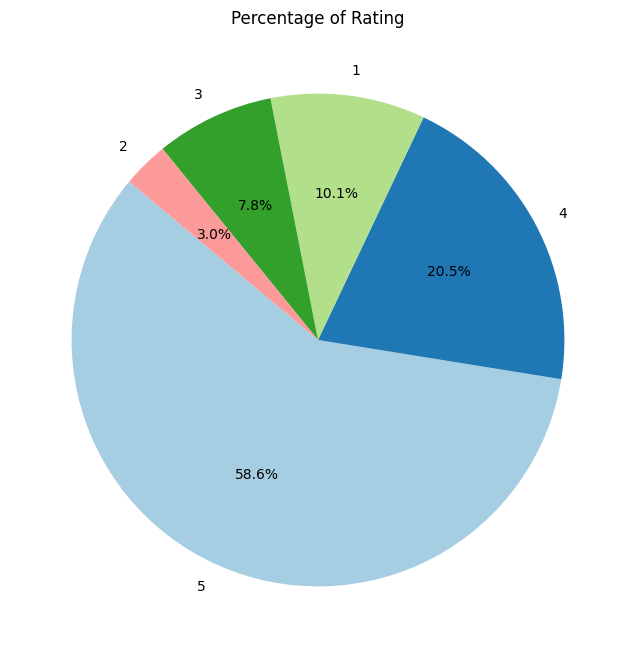

In [21]:
review_counts = df['Rate'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of Rating')
plt.show()

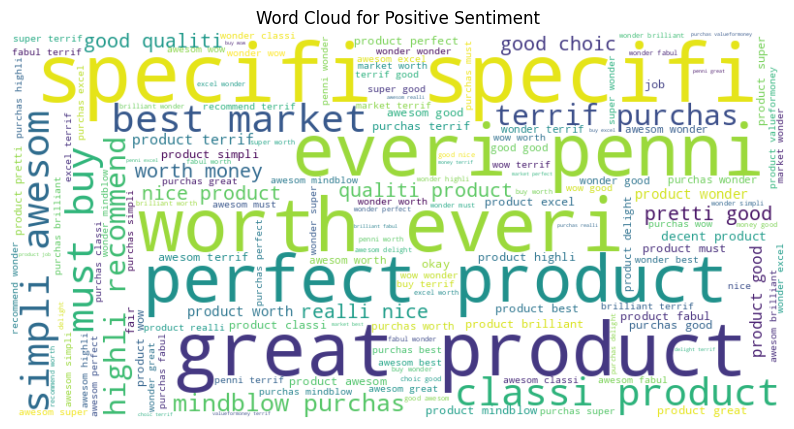

In [124]:
# Word cloud for positive sentiment
from wordcloud import WordCloud

positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['cleaned_review'])
wordcloud_positive = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

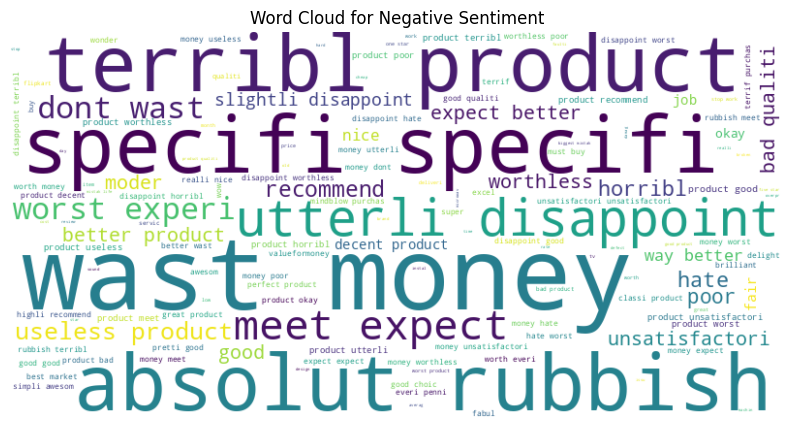

In [125]:
# Word cloud for negative sentiment
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['cleaned_review'])
wordcloud_negative = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')
plt.show()

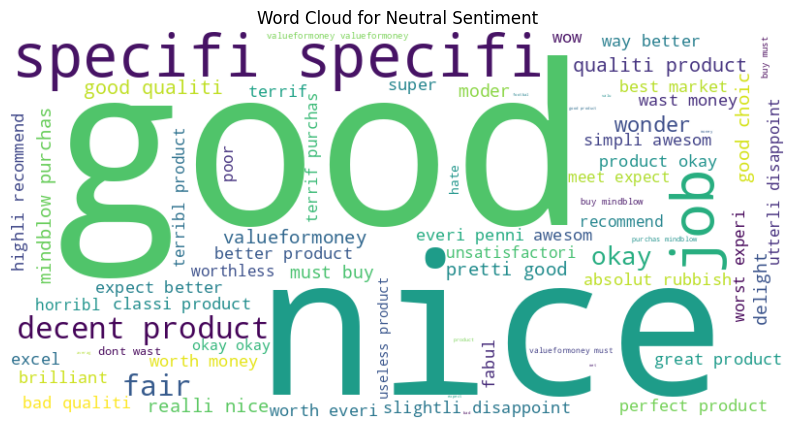

In [126]:
neutral_reviews = ' '.join(df[df['Sentiment'] == 'neutral']['cleaned_review'])

# Generate a word cloud for neutral sentiment
wordcloud_neutral = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(neutral_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')
plt.show()

In [127]:
df['cleaned_review'].value_counts(sort=True)[:20]

wonder               9015
specifi              8351
good                 6477
brilliant            5643
awesom               5642
great product        5624
classi product       5602
worth everi penni    5601
perfect product      5600
simpli awesom        5597
super                5588
must buy             5578
best market          5549
fabul                5529
wow                  5527
excel                5525
highli recommend     5525
terrif purchas       5508
mindblow purchas     5499
terrif               5440
Name: cleaned_review, dtype: int64

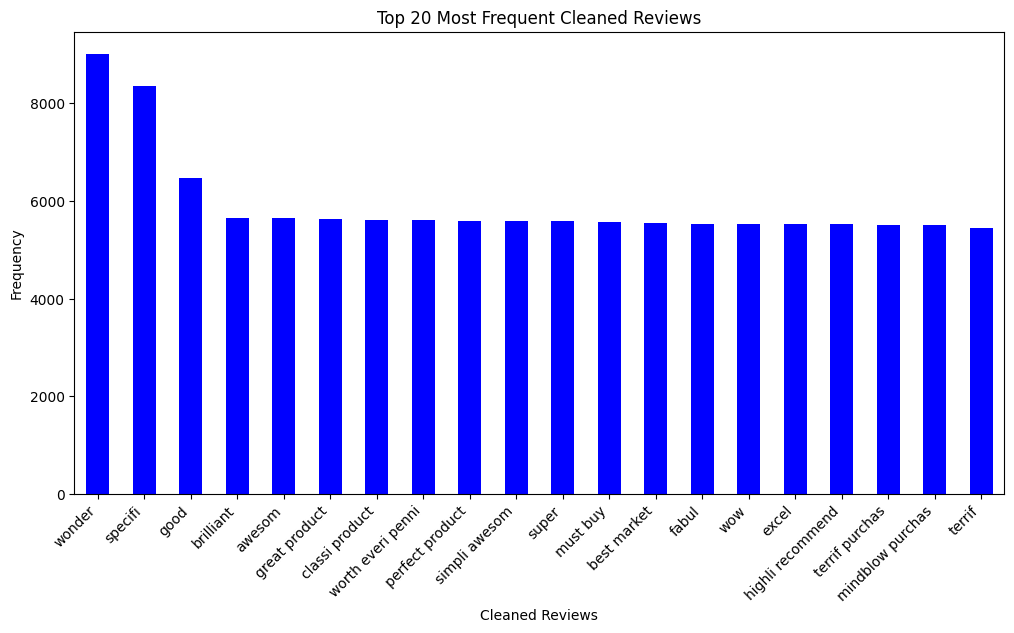

In [128]:
top_reviews_counts = df['cleaned_review'].value_counts(sort=True)[:20]

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_reviews_counts.plot(kind='bar', color='blue')
plt.title('Top 20 Most Frequent Cleaned Reviews')
plt.xlabel('Cleaned Reviews')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [129]:

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Apply to 'product_name' columns
df['cleaned_product_name'] = df['product_name'].apply(remove_special_characters)

<ipython-input-129-30e467d90e4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_product_name'] = df['product_name'].apply(remove_special_characters)


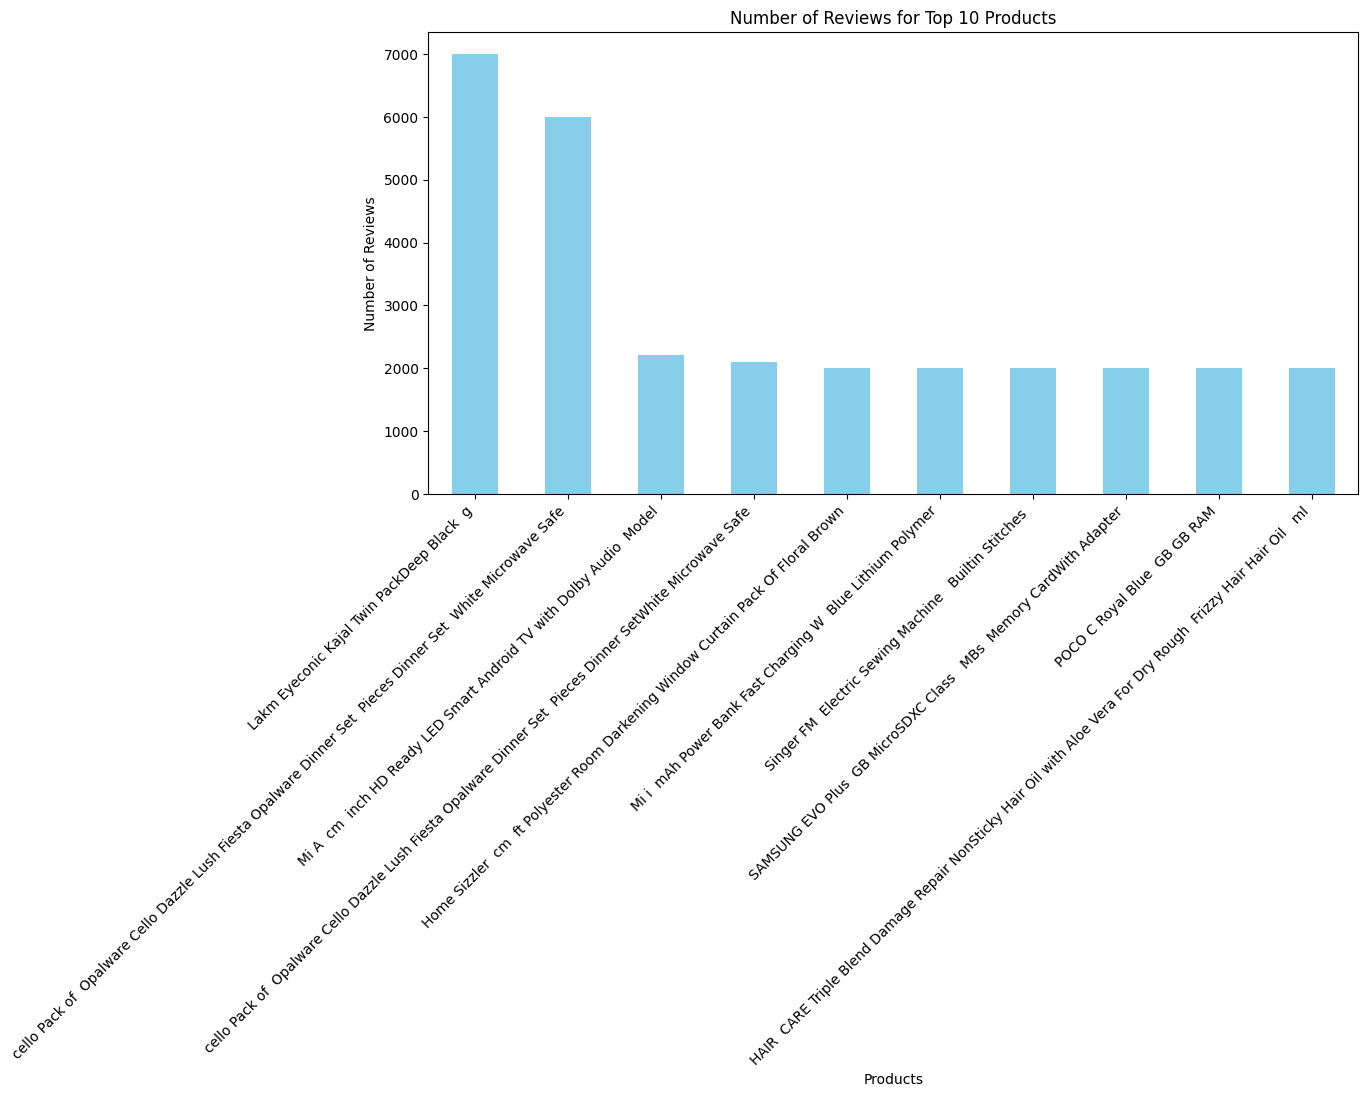

In [132]:
# Occurrences count of each product
top_products_counts = df['cleaned_product_name'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_products_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews for Top 10 Products')
plt.xlabel('Products')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

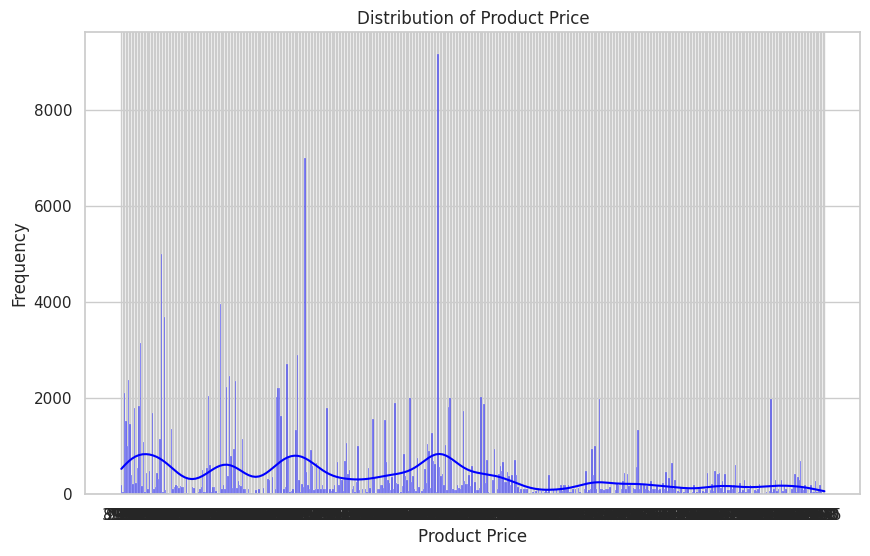

In [137]:
# Select the column for which you want to plot the distribution
column_to_plot = 'product_price'

# Create a histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df[column_to_plot], bins=30, kde=True, color='blue')

# Customize the plot
plt.title(f'Distribution of Product Price')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()

Feature Extraction: TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer for 'cleaned_review' column
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display TF-IDF DataFrame
print(tfidf_df.head())


   aboveaverag  absolut   ac  accept  achcha  act  advis  afford  aftersal  \
0          0.0      0.0  0.0     0.0     0.0  0.0    0.0     0.0       0.0   
1          0.0      0.0  0.0     0.0     0.0  0.0    0.0     0.0       0.0   
2          0.0      0.0  0.0     0.0     0.0  0.0    0.0     0.0       0.0   
3          0.0      0.0  0.0     0.0     0.0  0.0    0.0     0.0       0.0   
4          0.0      0.0  0.0     0.0     0.0  0.0    0.0     0.0       0.0   

   agaro  ...  wrost  xiaomi  yaar   ye  year  yet  yield   yr  zero  zip  
0    0.0  ...    0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  0.0  
1    0.0  ...    0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  0.0  
2    0.0  ...    0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  0.0  
3    0.0  ...    0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  0.0  
4    0.0  ...    0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  0.0  

[5 rows x 1054 columns]


Feature Extraction: Word Embeddings (Word2Vec)

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize sentences
tokenized_reviews = df['cleaned_review'].apply(word_tokenize)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Function to get average Word2Vec vectors
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=100):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

# Create Word2Vec vectors for 'cleaned_review' column
word2vec_vectors = df['cleaned_review'].apply(lambda x: get_average_word2vec(x, word2vec_model.wv))

# Convert Word2Vec vectors to a DataFrame
word2vec_df = pd.DataFrame(word2vec_vectors.tolist())

# Display Word2Vec DataFrame
print(word2vec_df.head())


         0         1         2         3         4         5         6   \
0  0.001203 -0.004806 -0.008333 -0.016414  0.000980 -0.013414 -0.004969   
1  0.004566 -0.012438 -0.010526 -0.020668 -0.004606 -0.019171 -0.012600   
2 -0.000322 -0.005439 -0.001573 -0.004314 -0.001720 -0.003095 -0.000886   
3  0.001840 -0.010175 -0.012308 -0.024556 -0.003089 -0.022607 -0.009493   
4 -0.000322 -0.005439 -0.001573 -0.004314 -0.001720 -0.003095 -0.000886   

         7         8         9   ...        90        91        92        93  \
0  0.014042 -0.003724 -0.003692  ...  0.011806 -0.003390  0.002169 -0.008251   
1  0.021423 -0.004422 -0.005501  ...  0.024950 -0.003618  0.001984 -0.011485   
2  0.005434 -0.003441 -0.002733  ...  0.004549 -0.003685 -0.002338 -0.003808   
3  0.026277 -0.009424 -0.008144  ...  0.025909 -0.004853  0.003202 -0.013289   
4  0.005434 -0.003441 -0.002733  ...  0.004549 -0.003685 -0.002338 -0.003808   

         94        95        96        97        98        99  
0  0

DATA MODELLING

RULE BASED APPROACH USING AFINN

In [ ]:
!pip install afinn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=f185b624366d2091736779d3a84e30bad402192d5714477228978bb304a1581a
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
# Import necessary libraries
from afinn import Afinn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize AFINN Sentiment Analyzer
afinn = Afinn()

# Step 2: Define a Function to Calculate Sentiment Score
def calculate_sentiment_score(text):
    return afinn.score(text)

# Step 3: Apply the Sentiment Score Function to the Dataset
df['sentiment_score_afinn'] = df['cleaned_review'].apply(calculate_sentiment_score)

# Step 4: Map Sentiment Scores to Labels
df['predicted_sentiment_afinn'] = df['sentiment_score_afinn'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Step 5: Evaluate the Rule-based Approach
accuracy_afinn = accuracy_score(df['Sentiment'], df['predicted_sentiment_afinn'])
classification_rep_afinn = classification_report(df['Sentiment'], df['predicted_sentiment_afinn'])
conf_matrix_afinn = confusion_matrix(df['Sentiment'], df['predicted_sentiment_afinn'])

# Display Rule-based Approach results
print("\n\nRule-based Approach using AFINN")
print(f"Accuracy: {accuracy_afinn}")
print("\nClassification Report:")
print(classification_rep_afinn)
print("\nConfusion Matrix:")
print(conf_matrix_afinn)


<ipython-input-24-4428e3ead0fa>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score_afinn'] = df['cleaned_review'].apply(calculate_sentiment_score)
<ipython-input-24-4428e3ead0fa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_sentiment_afinn'] = df['sentiment_score_afinn'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))




Rule-based Approach using AFINN
Accuracy: 0.4811504856521932

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.32      0.47     24400
     neutral       0.05      0.48      0.09      8807
    positive       0.89      0.51      0.65    147169

    accuracy                           0.48    180376
   macro avg       0.60      0.44      0.40    180376
weighted avg       0.85      0.48      0.60    180376


Confusion Matrix:
[[ 7893 11387  5120]
 [  671  4210  3926]
 [  654 71830 74685]]


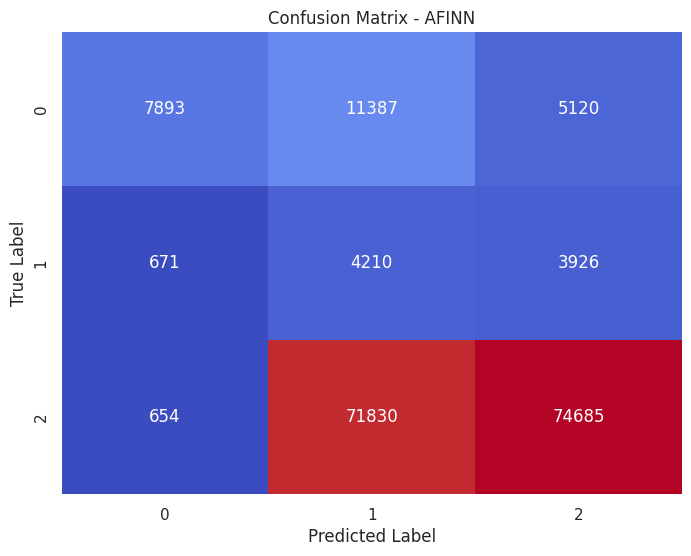

In [143]:
# Rule-based Approach using AFINN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_afinn, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - AFINN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

MACHINE LEARNING APPROACH

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb





In [ ]:


# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Word2Vec
tokenized_reviews = df['cleaned_review'].apply(word_tokenize)
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)
word2vec_vectors = df['cleaned_review'].apply(lambda x: get_average_word2vec(x, word2vec_model.wv))
word2vec_df = pd.DataFrame(word2vec_vectors.tolist())


In [ ]:
# Combine TF-IDF and Word2Vec features
features = pd.concat([tfidf_df, word2vec_df], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df['Sentiment'], test_size=0.2, random_state=42)


In [ ]:
# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
# Model 1: Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display Random Forest results
print("\n\nModel: Random Forest")
print(f"Accuracy: {accuracy_rf}")
print("\nClassification Report:")
print(classification_rep_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)




Model: Random Forest
Accuracy: 0.9078057434305355

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.75      0.80      4904
     neutral       1.00      0.00      0.00      1776
    positive       0.92      0.99      0.95     29396

    accuracy                           0.91     36076
   macro avg       0.92      0.58      0.58     36076
weighted avg       0.91      0.91      0.88     36076


Confusion Matrix:
[[ 3685     0  1219]
 [  314     1  1461]
 [  332     0 29064]]


In [ ]:
# Model 2: Neural Network (MLP)
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)

# Evaluate MLP model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Display MLP results
print("\n\nModel: Neural Network")
print(f"Accuracy: {accuracy_mlp}")
print("\nClassification Report:")
print(classification_rep_mlp)
print("\nConfusion Matrix:")
print(conf_matrix_mlp)




Model: Neural Network
Accuracy: 0.9081660938019737

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.76      0.80      4904
     neutral       0.00      0.00      0.00      1776
    positive       0.92      0.99      0.95     29396

    accuracy                           0.91     36076
   macro avg       0.59      0.58      0.58     36076
weighted avg       0.86      0.91      0.88     36076


Confusion Matrix:
[[ 3703     2  1199]
 [  315     0  1461]
 [  336     0 29060]]


In [ ]:
# Model 3: Support Vector Machine (SVM)
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display SVM results
print("\n\nModel: SVM")
print(f"Accuracy: {accuracy_svm}")
print("\nClassification Report:")
print(classification_rep_svm)
print("\nConfusion Matrix:")
print(conf_matrix_svm)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Model: SVM
Accuracy: 0.9081383745426322

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.75      0.80      4904
     neutral       0.00      0.00      0.00      1776
    positive       0.92      0.99      0.95     29396

    accuracy                           0.91     36076
   macro avg       0.59      0.58      0.58     36076
weighted avg       0.86      0.91      0.88     36076


Confusion Matrix:
[[ 3694     0  1210]
 [  313     0  1463]
 [  328     0 29068]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Convert string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Model 4: XGBoost
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
model_xgb.fit(X_train, y_train_encoded)
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
classification_rep_xgb = classification_report(y_test_encoded, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# Display XGBoost results
print("\n\nModel: XGBoost")
print(f"Accuracy: {accuracy_xgb}")
print("\nClassification Report:")
print(classification_rep_xgb)
print("\nConfusion Matrix:")
print(conf_matrix_xgb)




Model: XGBoost
Accuracy: 0.9077503049118527

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      4904
           1       0.50      0.00      0.00      1776
           2       0.92      0.99      0.95     29396

    accuracy                           0.91     36076
   macro avg       0.76      0.58      0.58     36076
weighted avg       0.89      0.91      0.88     36076


Confusion Matrix:
[[ 3691     0  1213]
 [  315     1  1460]
 [  339     1 29056]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['Sentiment'], test_size=0.2, random_state=42)

# Use CountVectorizer with MultinomialNB
vectorizer = CountVectorizer(max_features=5000)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Multinomial Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train_counts, y_train)
y_pred_nb = model_nb.predict(X_test_counts)

# Evaluate Multinomial Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Display Multinomial Naive Bayes results
print("\n\nModel: Multinomial Naive Bayes")
print(f"Accuracy: {accuracy_nb}")
print("\nClassification Report:")
print(classification_rep_nb)
print("\nConfusion Matrix:")
print(conf_matrix_nb)




Model: Multinomial Naive Bayes
Accuracy: 0.9021787337842333

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.72      0.78      4904
     neutral       0.09      0.00      0.01      1776
    positive       0.91      0.99      0.95     29396

    accuracy                           0.90     36076
   macro avg       0.62      0.57      0.58     36076
weighted avg       0.86      0.90      0.88     36076


Confusion Matrix:
[[ 3516    11  1377]
 [  302     5  1469]
 [  329    41 29026]]


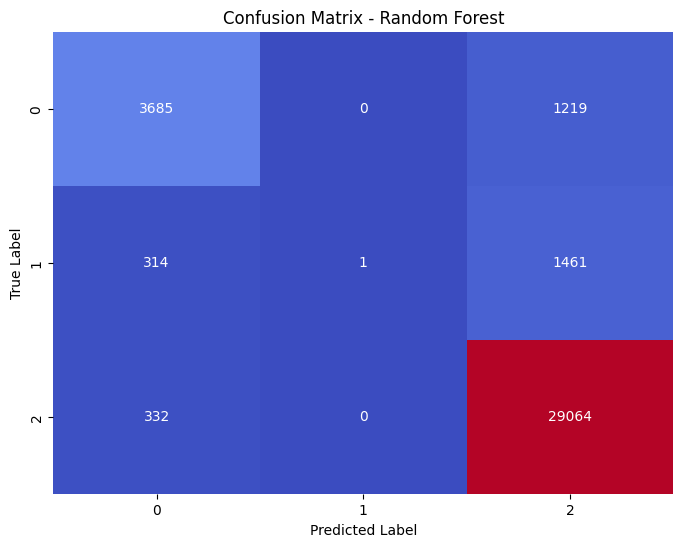

In [ ]:
# Model: Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

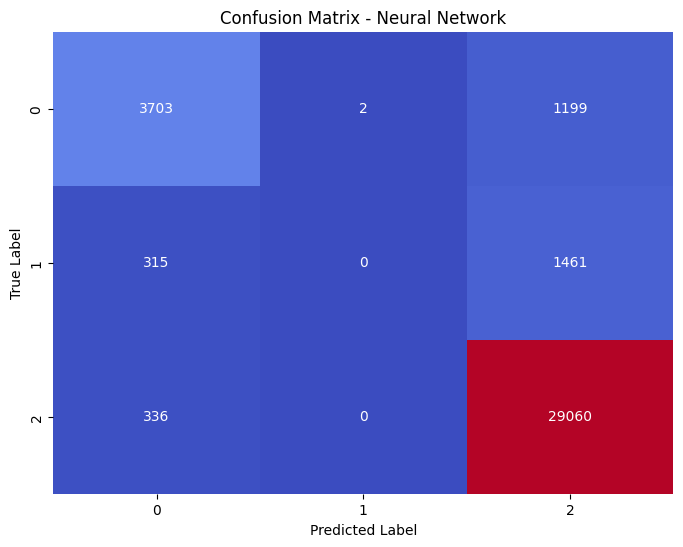

In [ ]:
# Model: Neural Network
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




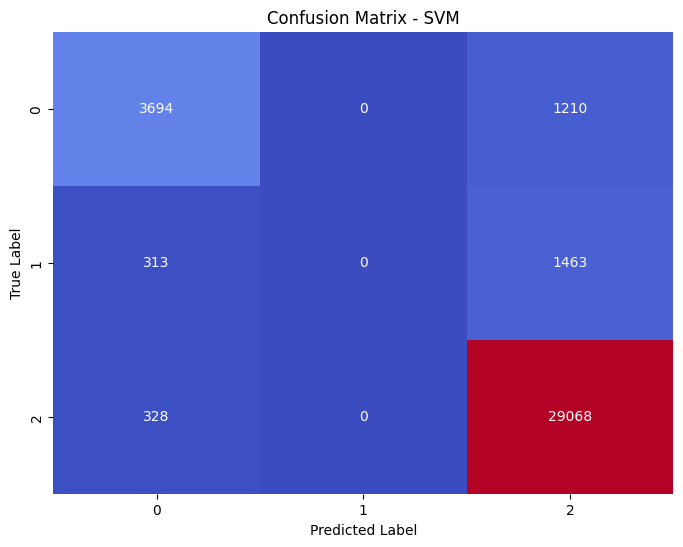

In [ ]:
# Model: SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



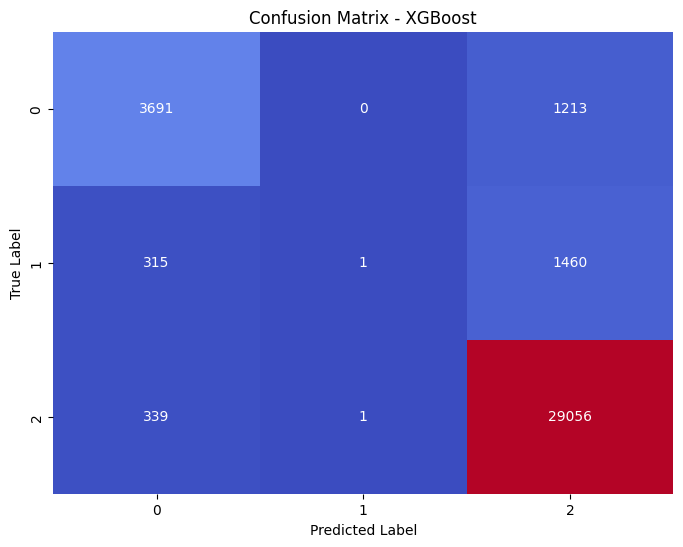

In [ ]:
# Model: XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



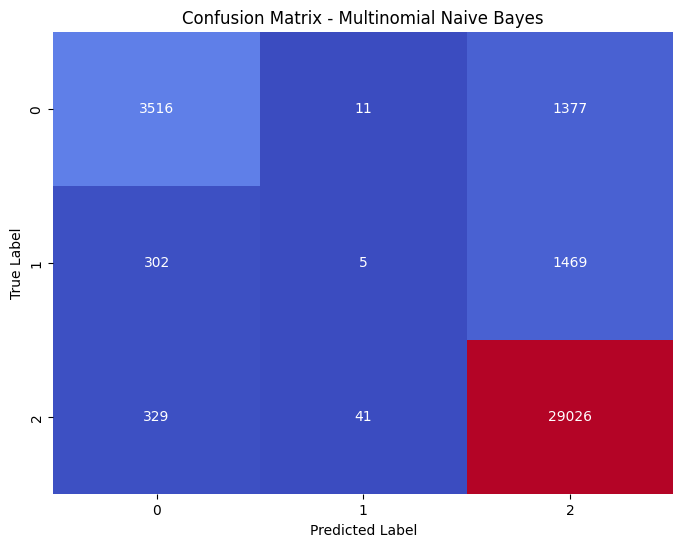

In [ ]:
# Model: Multinomial Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<ipython-input-63-c8f206ed904f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, ax=axes[0], palette='viridis')


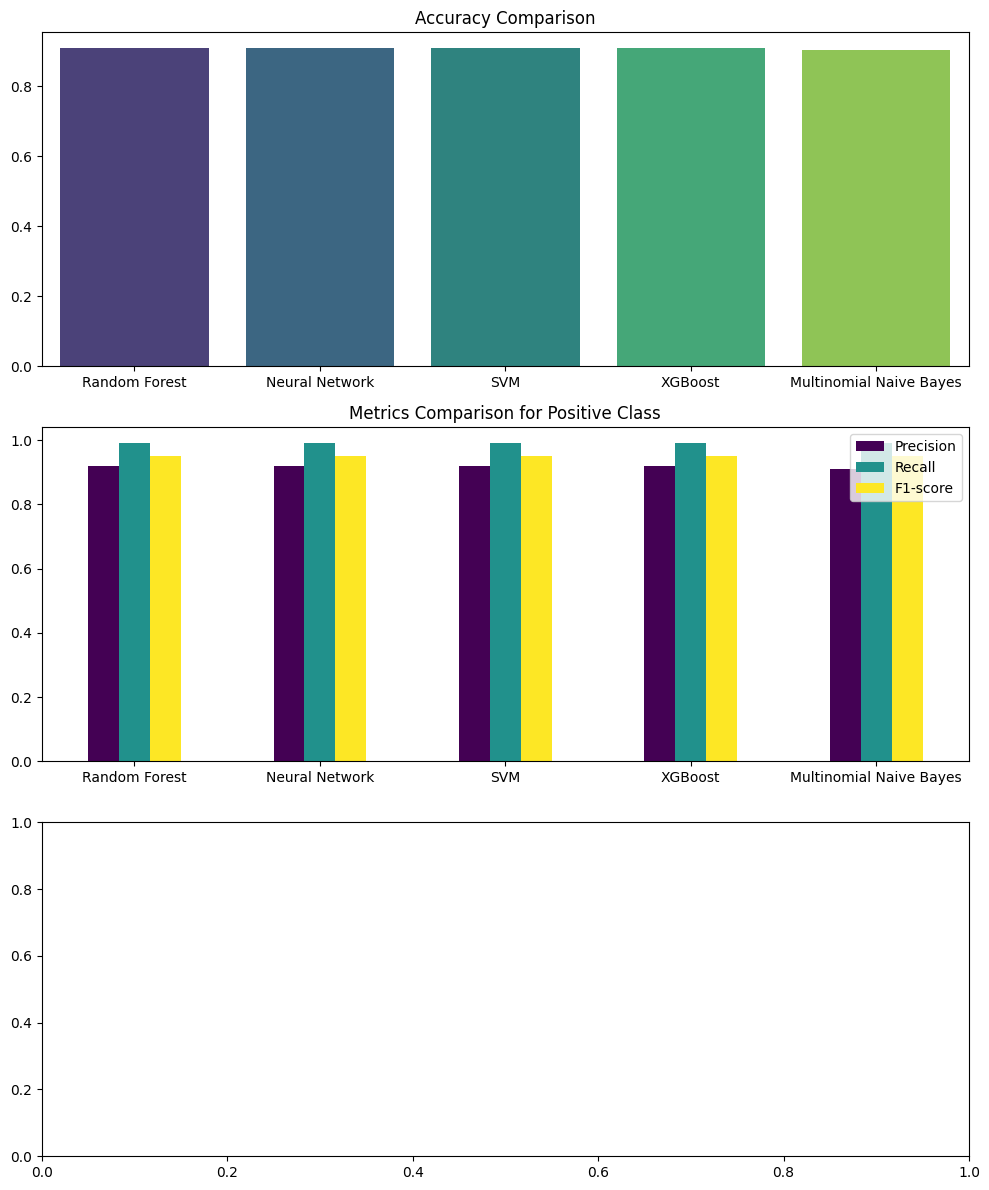

In [ ]:

# Model performance metrics
models = ['Random Forest', 'Neural Network', 'SVM', 'XGBoost', 'Multinomial Naive Bayes']
accuracy = [0.9078, 0.9082, 0.9081, 0.9077, 0.9022]
precision_positive = [0.92, 0.92, 0.92, 0.92, 0.91]
recall_positive = [0.99, 0.99, 0.99, 0.99, 0.99]
f1_positive = [0.95, 0.95, 0.95, 0.95, 0.95]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Accuracy comparison
sns.barplot(x=models, y=accuracy, ax=axes[0], palette='viridis')
axes[0].set_title('Accuracy Comparison')

# Precision, Recall, F1-score comparison for positive class
metrics_data = {'Precision': precision_positive, 'Recall': recall_positive, 'F1-score': f1_positive}
metrics_df = pd.DataFrame(metrics_data, index=models)
metrics_df.plot(kind='bar', ax=axes[1], colormap='viridis', rot=0)
axes[1].set_title('Metrics Comparison for Positive Class')

# Display the plots
plt.tight_layout()
plt.show()


NameError: name 'sns' is not defined

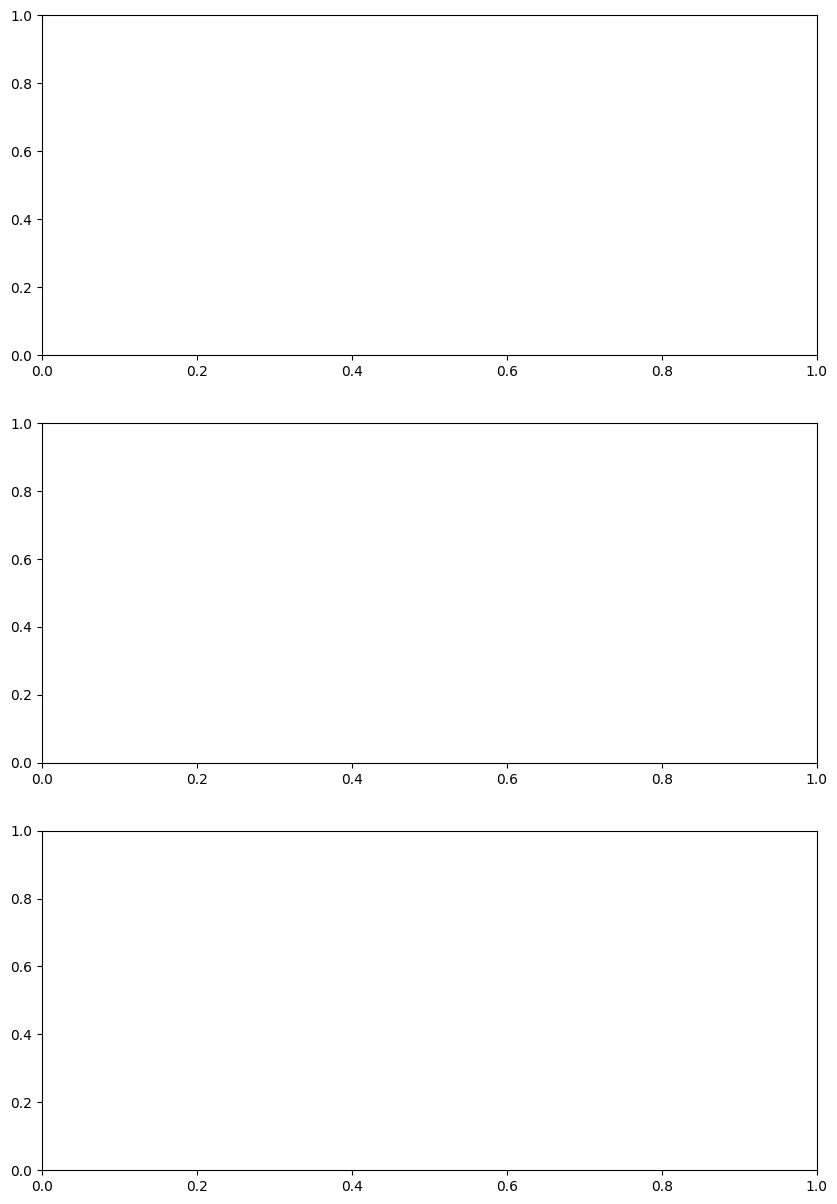

In [11]:
# Model performance metrics
models = ['Random Forest', 'Neural Network', 'SVM', 'XGBoost', 'Multinomial Naive Bayes']
accuracy = [0.9078, 0.9082, 0.9081, 0.9077, 0.9022]
precision_positive = [0.92, 0.92, 0.92, 0.92, 0.91]
recall_positive = [0.99, 0.99, 0.99, 0.99, 0.99]
f1_positive = [0.95, 0.95, 0.95, 0.95, 0.95]

precision_negative = [0.85, 0.85, 0.85, 0.85, 0.85]
recall_negative = [0.75, 0.76, 0.75, 0.75, 0.72]
f1_negative = [0.80, 0.80, 0.80, 0.80, 0.78]

precision_neutral = [1.00, 0.00, 0.00, 0.50, 0.09]
recall_neutral = [0.00, 0.00, 0.00, 0.00, 0.00]
f1_neutral = [0.00, 0.00, 0.00, 0.00, 0.01]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Accuracy comparison
sns.barplot(x=models, y=accuracy, ax=axes[0], palette='viridis')
axes[0].set_title('Accuracy Comparison')

# Precision, Recall, F1-score comparison for positive class
metrics_data_positive = {'Precision': precision_positive, 'Recall': recall_positive, 'F1-score': f1_positive}
metrics_df_positive = pd.DataFrame(metrics_data_positive, index=models)
metrics_df_positive.plot(kind='bar', ax=axes[1], colormap='viridis', rot=0)
axes[1].set_title('Metrics Comparison for Positive Sentiment')

# Precision, Recall, F1-score comparison for negative class
metrics_data_negative = {'Precision': precision_negative, 'Recall': recall_negative, 'F1-score': f1_negative}
metrics_df_negative = pd.DataFrame(metrics_data_negative, index=models)
metrics_df_negative.plot(kind='bar', ax=axes[2], colormap='viridis', rot=0)
axes[2].set_title('Metrics Comparison for Negative Sentiment')

# Precision, Recall, F1-score comparison for neutral class
metrics_data_neutral = {'Precision': precision_neutral, 'Recall': recall_neutral, 'F1-score': f1_neutral}
metrics_df_neutral = pd.DataFrame(metrics_data_neutral, index=models)
metrics_df_neutral.plot(kind='bar', ax=axes[2], colormap='viridis', rot=0)
axes[2].set_title('Metrics Comparison for Neutral Sentiment')

# Display the plots
plt.tight_layout()
plt.show()


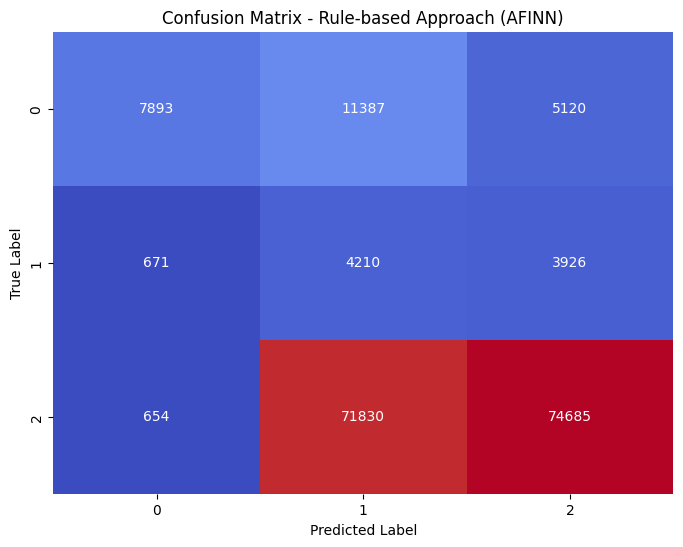

In [ ]:
# Rule-based Approach (AFINN)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_afinn, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - Rule-based Approach (AFINN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

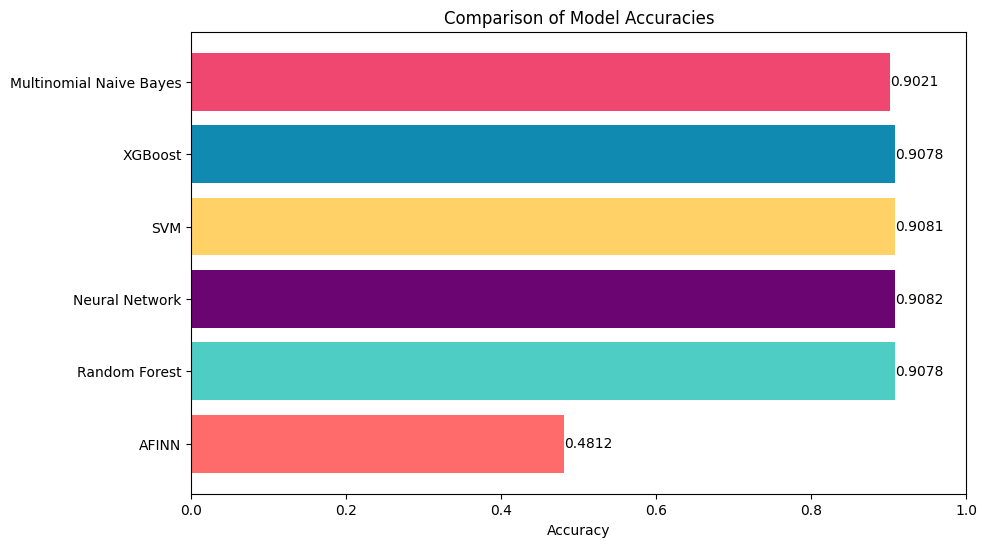

In [8]:
import matplotlib.pyplot as plt

models = ['AFINN', 'Random Forest', 'Neural Network', 'SVM', 'XGBoost', 'Multinomial Naive Bayes']
accuracies = [0.4812, 0.9078, 0.9082, 0.9081, 0.9078, 0.9021]

# Choose visually appealing colors for each model
colors = ['#FF6B6B', '#4ECDC4', '#6A0572', '#FFD166', '#118AB2', '#EF476F']

plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color=colors)

# Adding labels to the bars
for bar, label in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{label:.4f}',
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 1)  # Set the x-axis limit to better visualize differences
plt.show()


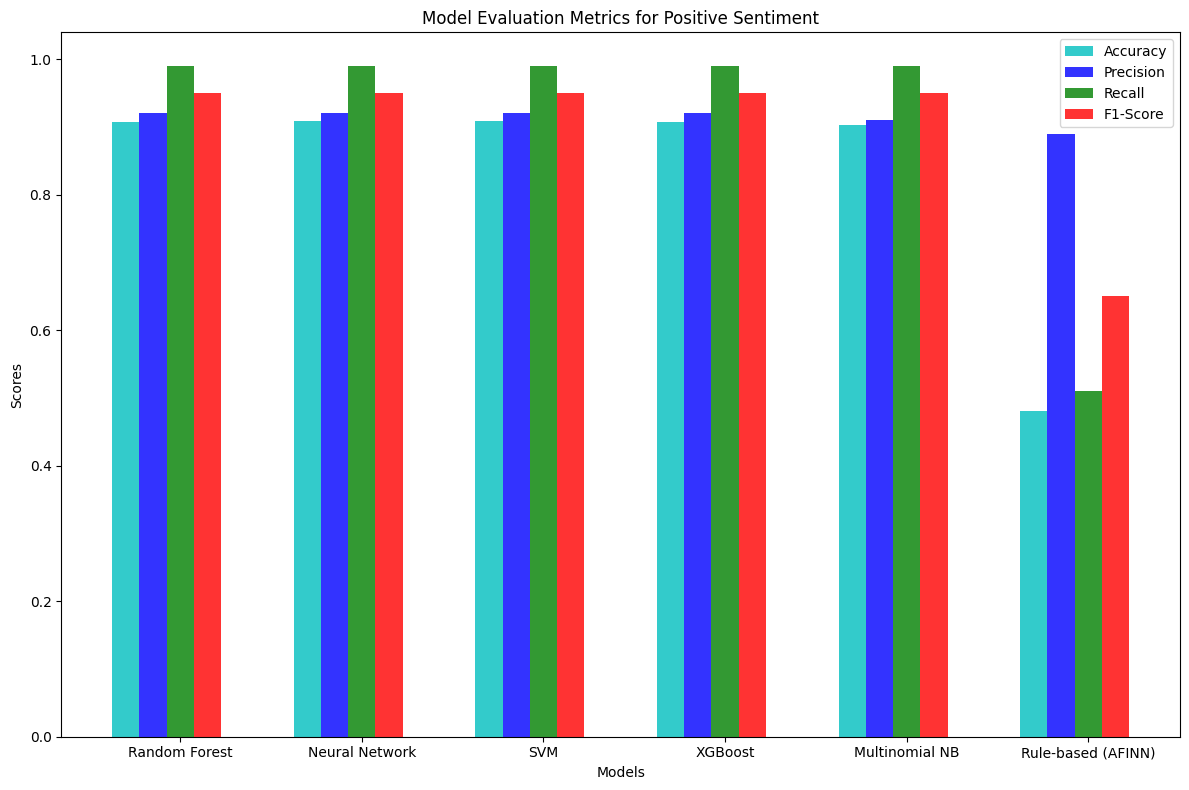

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Values from the classification report
accuracy = [0.9078, 0.9081, 0.9081, 0.9077, 0.9021, 0.4812]
precision = [0.92, 0.92, 0.92, 0.92, 0.91, 0.89]
recall = [0.99, 0.99, 0.99, 0.99, 0.99, 0.51]
f1_score = [0.95, 0.95, 0.95, 0.95, 0.95, 0.65]

labels = ['Random Forest', 'Neural Network', 'SVM', 'XGBoost', 'Multinomial NB', 'Rule-based (AFINN)']

# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

bar_width = 0.15
opacity = 0.8

index = np.arange(len(labels))

# Plotting accuracy
bar_accuracy = plt.bar(index, accuracy, bar_width, alpha=opacity, color='c', label='Accuracy')

# Plotting precision, recall, and F1-Score
bar_precision = plt.bar(index + bar_width, precision, bar_width, alpha=opacity, color='b', label='Precision')
bar_recall = plt.bar(index + 2 * bar_width, recall, bar_width, alpha=opacity, color='g', label='Recall')
bar_f1_score = plt.bar(index + 3 * bar_width, f1_score, bar_width, alpha=opacity, color='r', label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics for Positive Sentiment')
plt.xticks(index + 2 * bar_width, labels)
plt.legend()

plt.tight_layout()
plt.show()


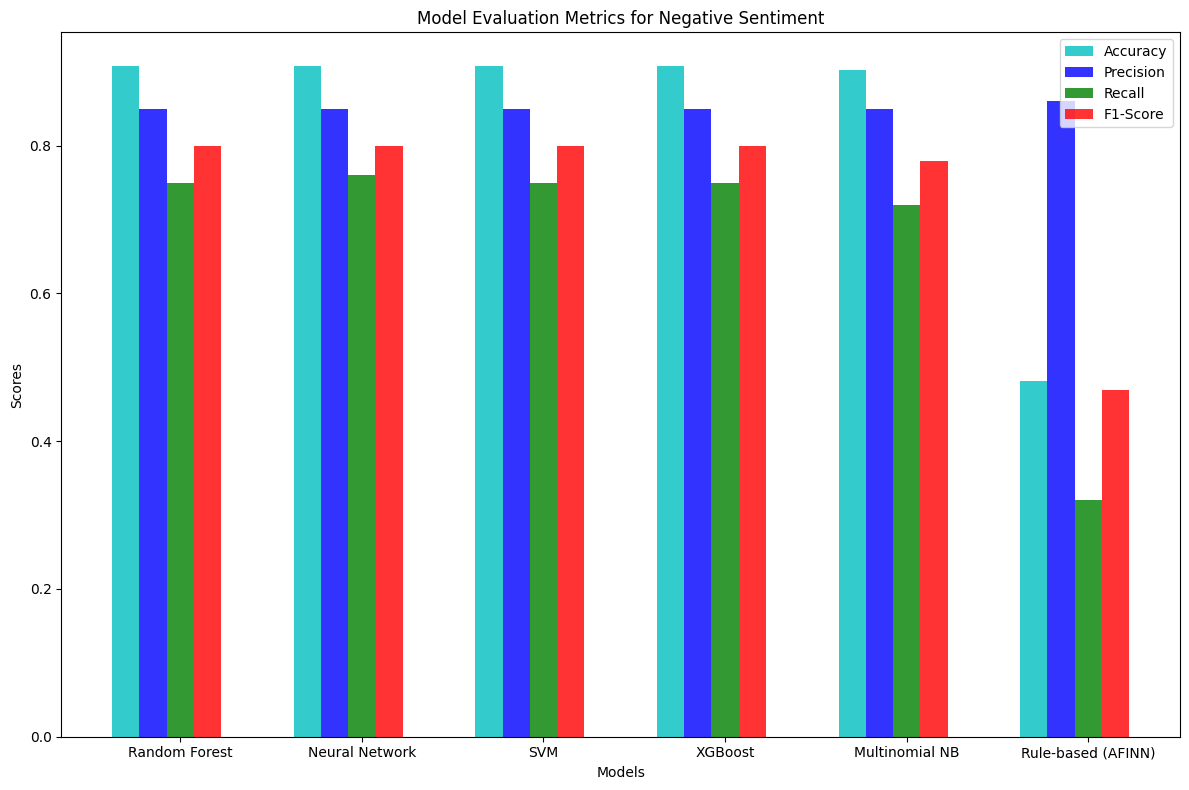

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Values from the classification report
accuracy = [0.9078, 0.9081, 0.9081, 0.9077, 0.9021, 0.4812]
precision = [0.85, 0.85, 0.85, 0.85, 0.85, 0.86]
recall = [0.75, 0.76, 0.75, 0.75, 0.72, 0.32]
f1_score = [0.80, 0.80, 0.80, 0.80, 0.78, 0.47]

labels = ['Random Forest', 'Neural Network', 'SVM', 'XGBoost', 'Multinomial NB', 'Rule-based (AFINN)']

# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

bar_width = 0.15
opacity = 0.8

index = np.arange(len(labels))

# Plotting accuracy
bar_accuracy = plt.bar(index, accuracy, bar_width, alpha=opacity, color='c', label='Accuracy')

# Plotting precision, recall, and F1-Score
bar_precision = plt.bar(index + bar_width, precision, bar_width, alpha=opacity, color='b', label='Precision')
bar_recall = plt.bar(index + 2 * bar_width, recall, bar_width, alpha=opacity, color='g', label='Recall')
bar_f1_score = plt.bar(index + 3 * bar_width, f1_score, bar_width, alpha=opacity, color='r', label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics for Negative Sentiment')
plt.xticks(index + 2 * bar_width, labels)
plt.legend()

plt.tight_layout()
plt.show()

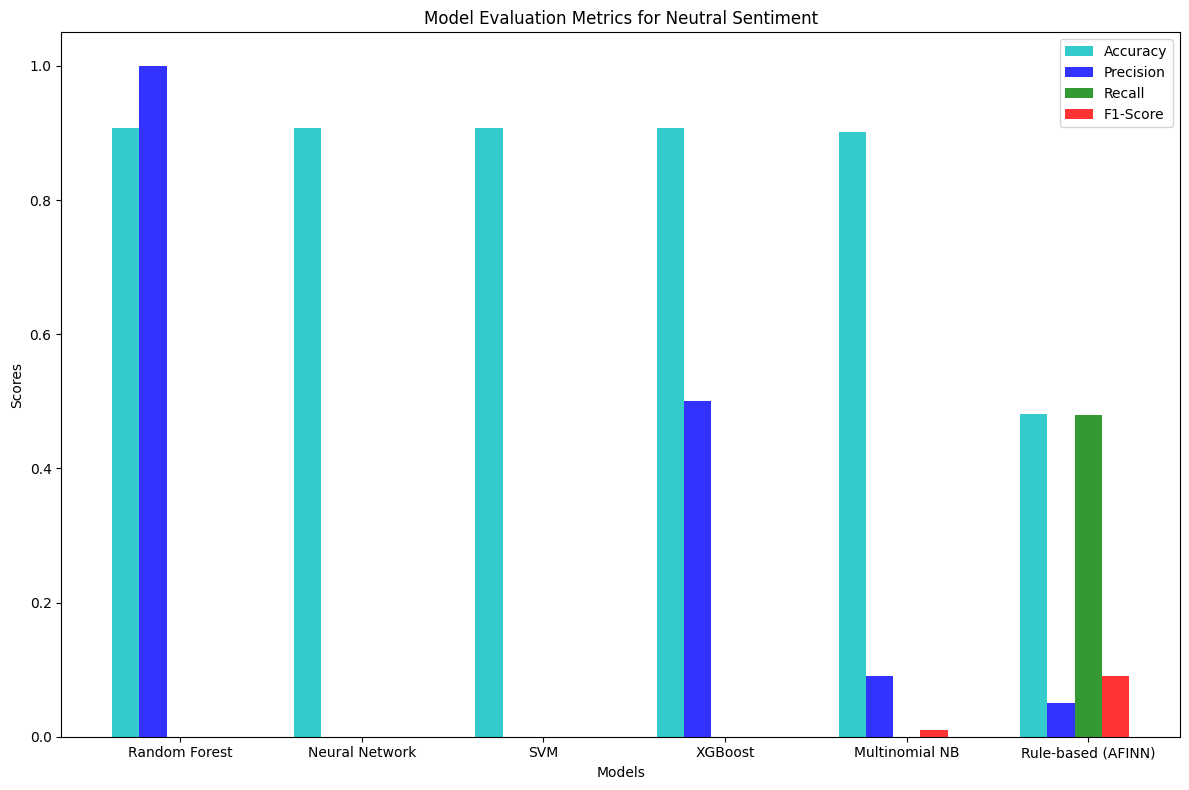

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Values from the classification report
accuracy = [0.9078, 0.9081, 0.9081, 0.9077, 0.9021, 0.4812]
precision = [1.00, 0.00, 0.00, 0.50, 0.09, 0.05]
recall = [0.00, 0.00, 0.00, 0.00, 0.00, 0.48]
f1_score = [0.00, 0.00, 0.00, 0.00, 0.01, 0.09]

labels = ['Random Forest', 'Neural Network', 'SVM', 'XGBoost', 'Multinomial NB', 'Rule-based (AFINN)']

# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

bar_width = 0.15
opacity = 0.8

index = np.arange(len(labels))

# Plotting accuracy
bar_accuracy = plt.bar(index, accuracy, bar_width, alpha=opacity, color='c', label='Accuracy')

# Plotting precision, recall, and F1-Score
bar_precision = plt.bar(index + bar_width, precision, bar_width, alpha=opacity, color='b', label='Precision')
bar_recall = plt.bar(index + 2 * bar_width, recall, bar_width, alpha=opacity, color='g', label='Recall')
bar_f1_score = plt.bar(index + 3 * bar_width, f1_score, bar_width, alpha=opacity, color='r', label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics for Neutral Sentiment')
plt.xticks(index + 2 * bar_width, labels)
plt.legend()

plt.tight_layout()
plt.show()

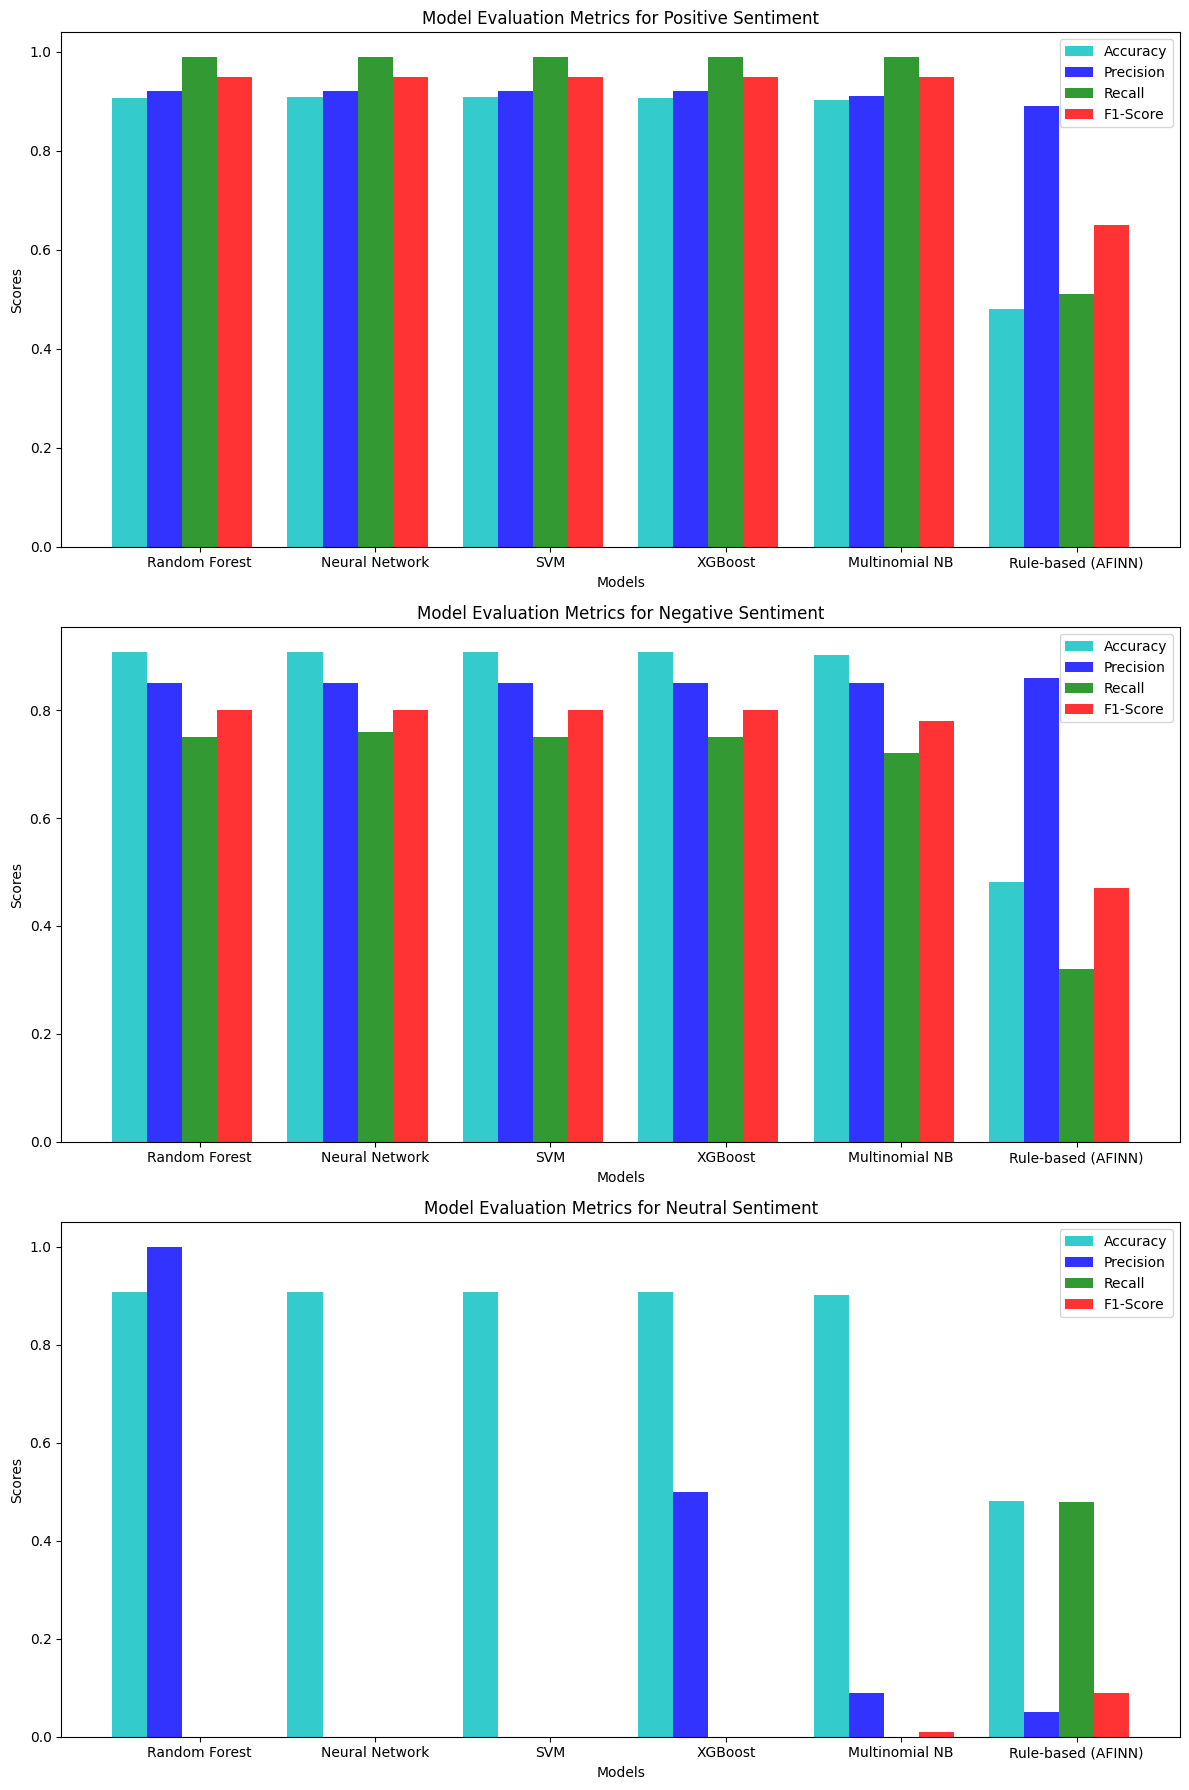

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Values from the classification reports
accuracy_positive = [0.9078, 0.9081, 0.9081, 0.9077, 0.9021, 0.4812]
precision_positive = [0.92, 0.92, 0.92, 0.92, 0.91, 0.89]
recall_positive = [0.99, 0.99, 0.99, 0.99, 0.99, 0.51]
f1_score_positive = [0.95, 0.95, 0.95, 0.95, 0.95, 0.65]

accuracy_negative = [0.9078, 0.9081, 0.9081, 0.9077, 0.9021, 0.4812]
precision_negative = [0.85, 0.85, 0.85, 0.85, 0.85, 0.86]
recall_negative = [0.75, 0.76, 0.75, 0.75, 0.72, 0.32]
f1_score_negative = [0.80, 0.80, 0.80, 0.80, 0.78, 0.47]

accuracy_neutral = [0.9078, 0.9081, 0.9081, 0.9077, 0.9021, 0.4812]
precision_neutral = [1.00, 0.00, 0.00, 0.50, 0.09, 0.05]
recall_neutral = [0.00, 0.00, 0.00, 0.00, 0.00, 0.48]
f1_score_neutral = [0.00, 0.00, 0.00, 0.00, 0.01, 0.09]

labels = ['Random Forest', 'Neural Network', 'SVM', 'XGBoost', 'Multinomial NB', 'Rule-based (AFINN)']

# Plotting the grouped bar chart
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

bar_width = 0.2
opacity = 0.8

index = np.arange(len(labels))

# Plotting positive sentiment
bar_accuracy_pos = ax1.bar(index, accuracy_positive, bar_width, alpha=opacity, color='c', label='Accuracy')
bar_precision_pos = ax1.bar(index + bar_width, precision_positive, bar_width, alpha=opacity, color='b', label='Precision')
bar_recall_pos = ax1.bar(index + 2 * bar_width, recall_positive, bar_width, alpha=opacity, color='g', label='Recall')
bar_f1_score_pos = ax1.bar(index + 3 * bar_width, f1_score_positive, bar_width, alpha=opacity, color='r', label='F1-Score')

ax1.set_xlabel('Models')
ax1.set_ylabel('Scores')
ax1.set_title('Model Evaluation Metrics for Positive Sentiment')
ax1.set_xticks(index + 2 * bar_width)
ax1.set_xticklabels(labels)
ax1.legend()

# Plotting negative sentiment
bar_accuracy_neg = ax2.bar(index, accuracy_negative, bar_width, alpha=opacity, color='c', label='Accuracy')
bar_precision_neg = ax2.bar(index + bar_width, precision_negative, bar_width, alpha=opacity, color='b', label='Precision')
bar_recall_neg = ax2.bar(index + 2 * bar_width, recall_negative, bar_width, alpha=opacity, color='g', label='Recall')
bar_f1_score_neg = ax2.bar(index + 3 * bar_width, f1_score_negative, bar_width, alpha=opacity, color='r', label='F1-Score')

ax2.set_xlabel('Models')
ax2.set_ylabel('Scores')
ax2.set_title('Model Evaluation Metrics for Negative Sentiment')
ax2.set_xticks(index + 2 * bar_width)
ax2.set_xticklabels(labels)
ax2.legend()

# Plotting neutral sentiment
bar_accuracy_neu = ax3.bar(index, accuracy_neutral, bar_width, alpha=opacity, color='c', label='Accuracy')
bar_precision_neu = ax3.bar(index + bar_width, precision_neutral, bar_width, alpha=opacity, color='b', label='Precision')
bar_recall_neu = ax3.bar(index + 2 * bar_width, recall_neutral, bar_width, alpha=opacity, color='g', label='Recall')
bar_f1_score_neu = ax3.bar(index + 3 * bar_width, f1_score_neutral, bar_width, alpha=opacity, color='r', label='F1-Score')

ax3.set_xlabel('Models')
ax3.set_ylabel('Scores')
ax3.set_title('Model Evaluation Metrics for Neutral Sentiment')
ax3.set_xticks(index + 2 * bar_width)
ax3.set_xticklabels(labels)
ax3.legend()

plt.tight_layout()
plt.show()


<ipython-input-14-a8735d308157>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, ax=axes[0], palette='viridis')


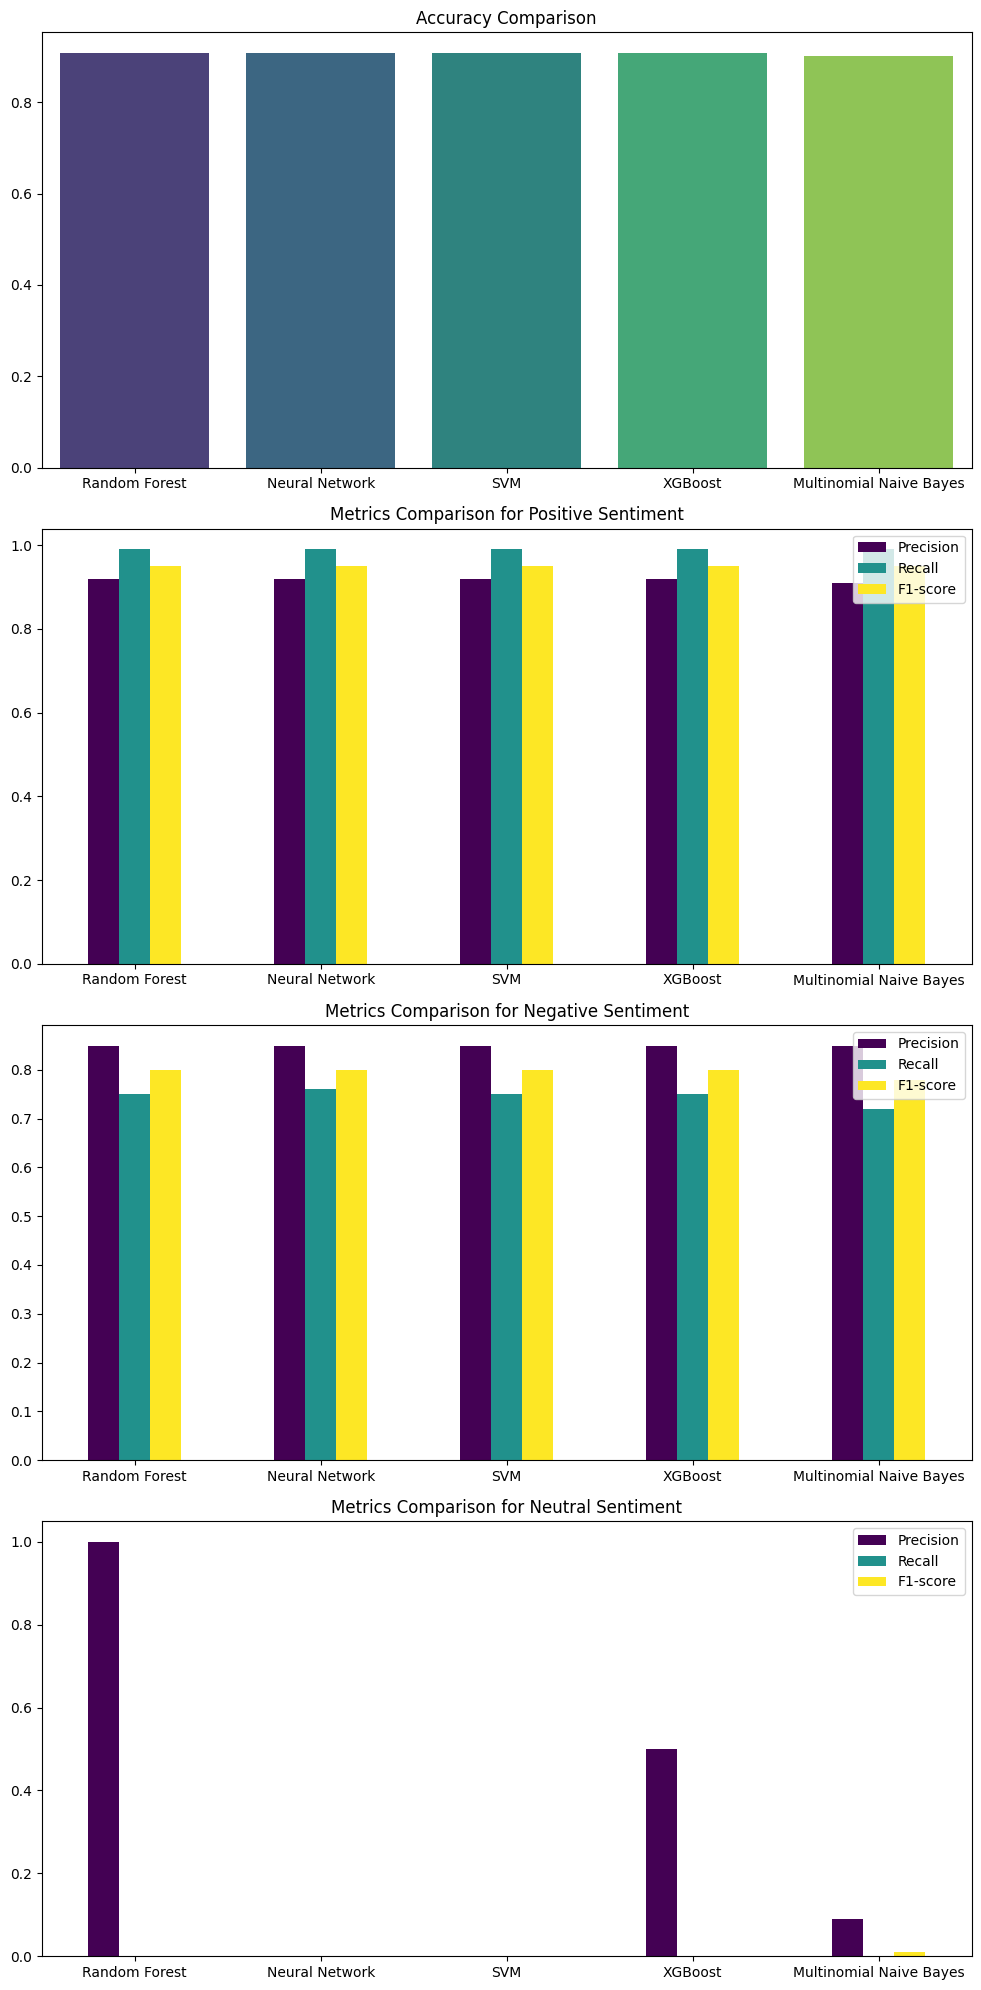

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model performance metrics
models = ['Random Forest', 'Neural Network', 'SVM', 'XGBoost', 'Multinomial Naive Bayes']
accuracy = [0.9078, 0.9082, 0.9081, 0.9077, 0.9022]
precision_positive = [0.92, 0.92, 0.92, 0.92, 0.91]
recall_positive = [0.99, 0.99, 0.99, 0.99, 0.99]
f1_positive = [0.95, 0.95, 0.95, 0.95, 0.95]

precision_negative = [0.85, 0.85, 0.85, 0.85, 0.85]
recall_negative = [0.75, 0.76, 0.75, 0.75, 0.72]
f1_negative = [0.80, 0.80, 0.80, 0.80, 0.78]

precision_neutral = [1.00, 0.00, 0.00, 0.50, 0.09]
recall_neutral = [0.00, 0.00, 0.00, 0.00, 0.00]
f1_neutral = [0.00, 0.00, 0.00, 0.00, 0.01]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

# Accuracy comparison
sns.barplot(x=models, y=accuracy, ax=axes[0], palette='viridis')
axes[0].set_title('Accuracy Comparison')

# Precision, Recall, F1-score comparison for positive class
metrics_data_positive = {'Precision': precision_positive, 'Recall': recall_positive, 'F1-score': f1_positive}
metrics_df_positive = pd.DataFrame(metrics_data_positive, index=models)
metrics_df_positive.plot(kind='bar', ax=axes[1], colormap='viridis', rot=0)
axes[1].set_title('Metrics Comparison for Positive Sentiment')

# Precision, Recall, F1-score comparison for negative class
metrics_data_negative = {'Precision': precision_negative, 'Recall': recall_negative, 'F1-score': f1_negative}
metrics_df_negative = pd.DataFrame(metrics_data_negative, index=models)
metrics_df_negative.plot(kind='bar', ax=axes[2], colormap='viridis', rot=0)
axes[2].set_title('Metrics Comparison for Negative Sentiment')

# Precision, Recall, F1-score comparison for neutral class
metrics_data_neutral = {'Precision': precision_neutral, 'Recall': recall_neutral, 'F1-score': f1_neutral}
metrics_df_neutral = pd.DataFrame(metrics_data_neutral, index=models)
metrics_df_neutral.plot(kind='bar', ax=axes[3], colormap='viridis', rot=0)
axes[3].set_title('Metrics Comparison for Neutral Sentiment')

# Display the plots
plt.tight_layout()
plt.show()
